In [1]:
import warnings as _wrn
_wrn.filterwarnings('always')

In [2]:
import sys as _sys
import itertools as _itr
import pickle as _pkl

import numpy as _nmp
import numpy.random as _rnd
import matplotlib.pyplot as _plt
import pandas as _pnd

%load_ext autoreload
%autoreload 2
%matplotlib inline

_plt.style.use('ggplot')

In [3]:
_sys.path.append('../')
import eQTLseq as _assoc

In [19]:
# ... load real data

data = {
    'G': _pnd.read_table('/home/dimitris/WTCHG/Projects/eQTLseq/data/geuvadis/genotypes.TF.common.HIGH.no_missing.txt', index_col=0, header=None),
    'Z': _pnd.read_table('/home/dimitris/WTCHG/Projects/eQTLseq/data/geuvadis/counts_miRNAs.txt', index_col=0)
}

samples = data['G'].index & data['Z'].columns

data['Z'] = data['Z'][samples].values
data['G'] = data['G'].loc[samples].values

(452, 37) (408, 452)


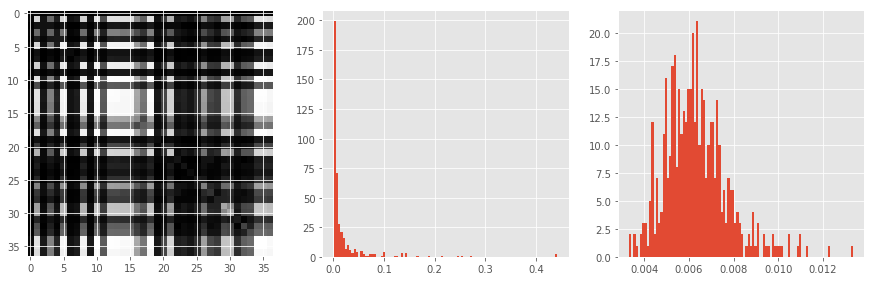

In [20]:
# prepare data

Z = data['Z']
G = data['G']

Z = Z[Z.mean(1) > 10, :]       # keep only expressed tags
# Z = Z[Z.sum(1) > _nmp.percentile(Z.sum(1), 40), :]
G = G[:, _nmp.std(G, 0) > 0] # keep only non-monomorphic loci

Z = Z / _assoc.calculate_norm_factors(Z)
Z = _assoc.transform_data(Z, kind='arcsin')

print(G.shape, Z.shape)

# take a quick look at the data

_plt.figure(figsize=(15,10));
_plt.subplot(2,3,1); _plt.imshow(G.T.dot(G), cmap=_plt.cm.Greys_r);
_plt.subplot(2,3,2); _plt.hist(Z[:, 0], bins=100);
_plt.subplot(2,3,3); _plt.hist(Z[0, :], bins=100);

In [ ]:
# _rnd.seed(0)
res = _assoc.run(Z.T, G, n_iters = 1000, model='Normal', n_threads=8)

In [ ]:
# with open('/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw/TF.common.HIGH.tfs.339.NBinomial.none.1.pkl', 'rb') as fh:
#     res = _pkl.load(fh)

##
_plt.figure(figsize = (15,10));

_plt.subplot(4,1,1); _plt.plot(res['state'][100:]); _plt.xlabel('iteration'); _plt.ylabel('state')
_plt.subplot(4,1,2); _plt.vlines(range(res['beta'].size), 0, res['beta']); _plt.xlabel('markers x genes'); _plt.ylabel('effect size')
_plt.axhline(linestyle='--', color='k');


##
tmp = res['beta'][_nmp.abs(res['beta'])>0.25 * _nmp.max(_nmp.abs(res['beta']))]
print(_nmp.min(_nmp.abs(tmp)), tmp.size)
_plt.subplot(4,1,3); _plt.hist(tmp.ravel(), 100);

##
_nmp.transpose((_nmp.abs(res['beta']) > 1e-6).nonzero())


In [ ]:
cp eQTLseq/*.py /home/dimitris/WTCHG/Projects/eQTLseq/eQTLseq/

In [ ]:
G.ravel() in (0,1)

In [ ]:
_nmp.min(res['zeta'])

In [ ]:
with open('/home/dimitris/WTCHG/Projects/eQTLseq/data/geuvadis/N1000.M100.G1000.P1_1_0_0.S2.R1.2.1.pkl', 'rb') as fh: 
    tmp = _pkl.load(fh)

In [ ]:
_nmp.min(tmp['phi']), tmp['poisson'].sum(), tmp['outliers'].sum()

In [ ]:
tmp.keys()

In [ ]:
100/1000

In [ ]:
data['G'].shape

In [ ]:
data['G'][:,:8]

In [ ]:
_nmp.any(data['G'] == -1, 0).sum()

In [ ]:
G.shape

In [ ]:
75/100*452

In [ ]:
cnts = _pnd.read_table('/home/dimitris/Data/Geuvadis/counts/counts_miRNAs.txt', index_col=0).values
flt = cnts[cnts.mean(1) > 0,:]
p = (flt + 1*0) / (flt.sum(0) + 0*flt.shape[0])
arcsin = _nmp.arcsin(_nmp.sqrt(p))
logit = _nmp.log(p / (1 - p))
log = _nmp.log(p)

In [ ]:
_plt.plot(arcsin.mean(1), arcsin.std(1), '.')

In [ ]:
_plt.hist(arcsin.ravel(), 100);

In [ ]:
3.14/2